## Mid-term Project

$$ 3rd Question $$: What is ECG and EEG signals?

Electrocardiography is a method that registers electrical activity against time. The changes in electrical potential difference (voltage) during depolarization and repolarisation of the myocardial fibers are recorded by electrodes positioned on the surface of the chest and on the limb (limb leads). The sources of the electrical potentials are contractile cardiac muscle cells (cardiomyocytes). The ECG waveform is either printed onto graph paper that runs at a constant speed or shown on a computer screen. The advantages of electrocardiography come with its low cost, immediate availability and easy implementation. The procedure itself is also non-invasive.

Electroencephalography (EEG) is an electrophysiological monitoring method to record electrical activity of the brain. It is typically noninvasive, with the electrodes placed along the scalp, although invasive electrodes are sometimes used such as in electrocorticography. EEG measures voltage fluctuations resulting from ionic current within the neurons of the brain.[1] In clinical contexts, EEG refers to the recording of the brain's spontaneous electrical activity over a period of time,[1] as recorded from multiple electrodes placed on the scalp. Diagnostic applications generally focus either on event-related potentials or on the spectral content of EEG. The former investigates potential fluctuations time locked to an event like stimulus onset or button press. The latter analyses the type of neural oscillations (popularly called "brain waves") that can be observed in EEG signals in the frequency domain.

$$4th Question$$


 file length: 43081 as expected from 43081 samples x 1 line

length of time array: 43081


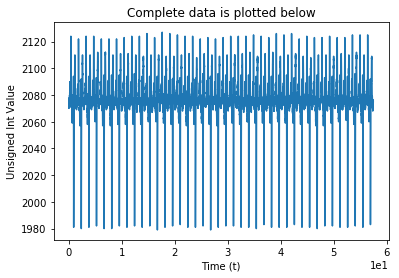

In [17]:

%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division


f = open('aami3a.dat','rb')
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
print('\n file length: ' + str(len(AllSignal)) + ' as expected from 43081 samples x 1 line')
#sampling at 750 hz
x=np.arange(0,43081/750.,1/750.)
print('\nlength of time array: ' + str(len(x)) )
plt.subplot(111)
plt.plot(x,AllSignal[:43081])
plt.title('Complete data is plotted below')
plt.xlabel('Time (t)')
plt.ylabel('Unsigned Int Value')
plt.ticklabel_format( axis='x', scilimits=(0,0))
f.close()

$$5th Question$$: Assuming that aperson has 60 beats per minute, we need to plot samples till 7 sec: 5 sec for beats and 2 sec for signal acquiring and reverse recovery pulse.
Let Ts denote the Sampling time, f denote the Sampling Frequency and Required samples N.

$$Ts=\frac{1}{f} $$

$$ N=\frac{7}{Ts}$$

$$N=5250$$

the same logic holds good for 100 beats per minute as well.

$$ $$

$$6th question:$$

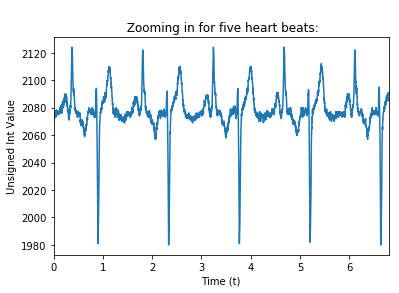

In [18]:

x1=np.arange(0,5250/750.,1/750.)
plt.plot(x1,AllSignal[:5250])
plt.title('\n Zooming in for five heart beats:')
plt.xlabel('Time (t)')
plt.ylabel('Unsigned Int Value')
plt.xlim([0,6.8])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


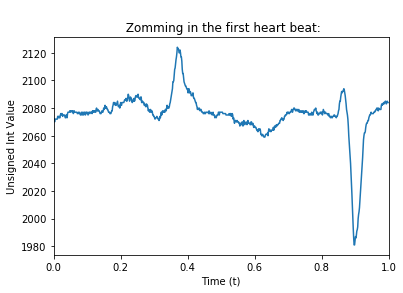

In [19]:

x1=np.arange(0,750/750.,1/750.)
plt.plot(x1,AllSignal[:750])
plt.title('\n Zomming in the first heart beat:')
plt.xlabel('Time (t)')
plt.ylabel('Unsigned Int Value')
plt.xlim([0,1])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


$$7th Question$$: The given ECG signal is of a normal person. Comparing with the given ECG signal, the individual in our context has a lower Heart rate..(in the following section while we calculate the number of heart beats, we get 44 per minute which is lower than a normal person i.e, 60 t0 too per minute.

Peak of the QRS Curve: 2124
Number of Heart beats per minute: 44


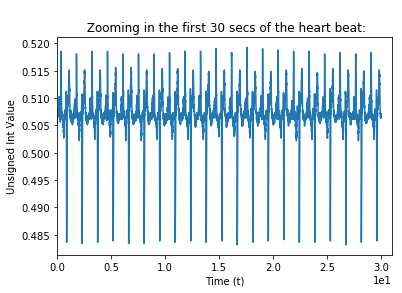

In [20]:
t=np.arange(22500)
B=0
x1=np.arange(0,22500/750.,1/750.)
plt.plot(x1,AllSignal[:22500]/4096)
plt.title('\n Zooming in the first 30 secs of the heart beat:')
plt.xlabel('Time (t)')
plt.ylabel('Unsigned Int Value')
plt.xlim([0,31])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
x=np.amax(AllSignal[:750])
print 'Peak of the QRS Curve: ' +str (x)
for index in t:
    if AllSignal[index]>=2124:
        B=B+1
print 'Number of Heart beats per minute: ' +str(B*2)        
        
    
        



$$8th Answer$$: 44 beats per minute 

$$9th and 10th Question$$

Peak in DFT data is 4.98149090804
Maximum f is observed at=1.39275766017


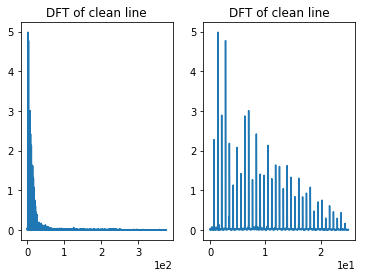

In [21]:
from __future__ import division
Line=AllSignal[:43080]
L2=np.arange(21540)
dataF=Line-np.mean(Line)
L=len(dataF)
f=np.arange(0,750/2.,750/43080.)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L

plt.subplot(121)
plt.plot(f, PyyClean[:21540])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>25)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
p=np.amax(PyyClean[:21540])
print 'Peak in DFT data is ' +str(p)
for index in L2:
    if PyyClean[index]>=4.9814:
        print 'Maximum f is observed at=' +str(index/57.44)  
        break 
       

        
        

    

$$11th Question:$$
Heart rate H is given by

$$H=\frac{60}{f}$$  where f is frequency observed at the peak

$$H=44$$

$$12th question$$:
Frequency analysis of any given signal is obtained by DFT.
The peaks obsserved above in the obtained DFT are the Harmonics of the Heartbeat while the other smaller peaks are simply Noise elements which is removed in the following code by using a low pass filter. 
 
Heart rate is obtained by by the formulae given while answering the 11th question.

$$ 13th Question $$: Generally Low pass filters are used in order to pass low amplitude signal while removing the higher amplitude signals which are above the cut off or the rolloff frequency of the designed filter.
Where as in our case, we have obtained a signal with lower signal harmonics having lower Amplitude, hence using a low pass filter will not effect the amplitude of the signal.

** 3rd reference.

14th Question and 15th question

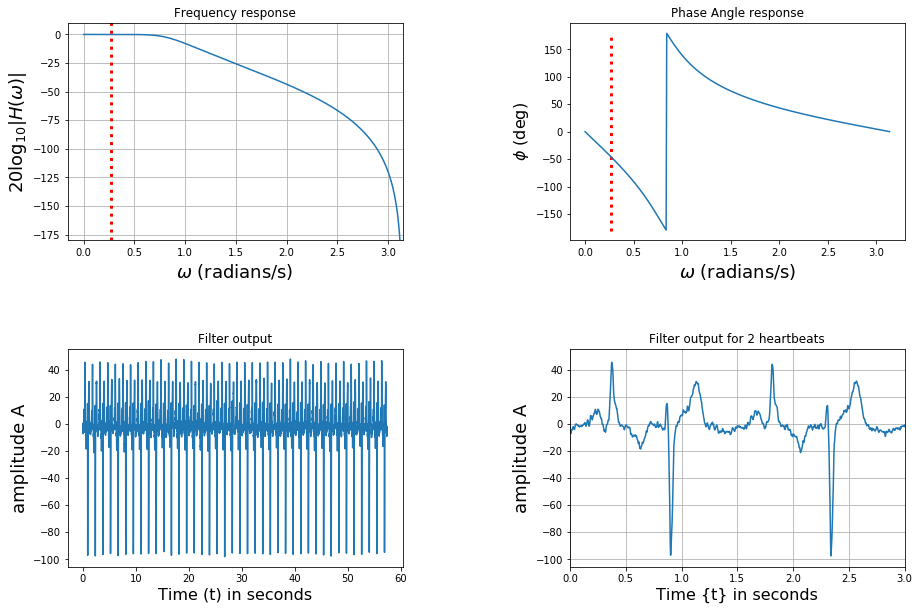

In [22]:
from scipy import signal
import numpy as np
from __future__ import division
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=750
NF=fs/2
cutoff= 100
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)
x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency response')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase Angle response')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,s)
ax.set_title('Filter output')
ax.set_ylabel("amplitude A",fontsize=18)
ax.set_xlabel('Time (t) in seconds',fontsize=16)

ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(x,s)
ax.set_xlim(xmax = 3, xmin =0)
ax.set_title('Filter output for 2 heartbeats')
ax.set_ylabel("amplitude A",fontsize=18)
ax.set_xlabel('Time {t} in seconds',fontsize=16)

ax.grid()

16th Question:

Peak in DFT data is 4.98133389394
Maximum frequency is observed at f=1.39275766017


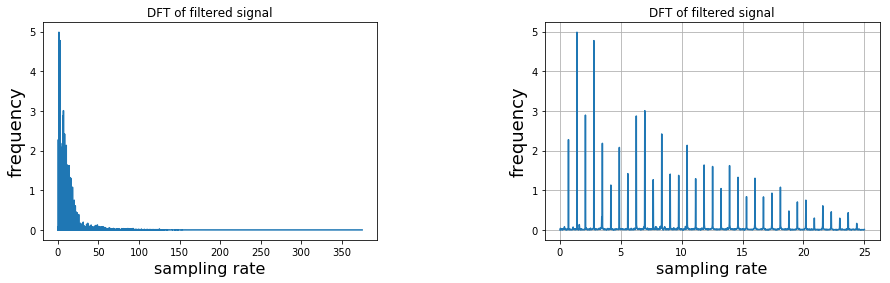

In [23]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

LL=len(s)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
ff=np.arange(0,750/2,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:21540])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel('sampling rate',fontsize=16)
indx=np.where(ff>25)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel('sampling rate',fontsize=16)

ax.grid()

p=np.amax(Pyy[:21540])
print 'Peak in DFT data is ' +str(p)
L2=np.arange(21540)
for index in L2:
    if Pyy[index]>=4.98:
        print 'Maximum frequency is observed at f=' +str(index/57.44)  
        break 

$$ 17th Question &&: As discussed in the 13th question, as we are using a low pass filter, our signal amplitube is not effected as we the signal amplitude is low. This is evident in the results plotted. Compare the plots of the DFT of the signal before and after Filtering. 

$$REFERENCES$$
1) Wasilewski J., Poloński L. (2012) An Introduction to ECG Interpretation. In: Gacek A., Pedrycz W. (eds) ECG Signal Processing, Classification and Interpretation. Springer, London
DOI: https://doi.org/10.1007/978-0-85729-868-3_1
Publisher Name: Springer, London

2) Niedermeyer E.; da Silva F.L. (2004). Electroencephalography: Basic Principles, Clinical Applications, and Related Fields. Lippincott Williams & Wilkins. ISBN 0-7817-5126-8

3)https://electronics.stackexchange.com

4)www.kircherelectronics.com
